In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import setrecursionlimit
from google.colab import files
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# **The Dataset from:**
Jain, Kanishka (2020), “6000+ Indian Food Recipes Dataset”, Mendeley Data, V1, doi: 10.17632/xsphgmmh7b.1

http://dx.doi.org/10.17632/xsphgmmh7b.1

In [2]:
uploaded = files.upload()


Saving IndianFoodDatasetCSV.csv to IndianFoodDatasetCSV.csv


In [3]:
df = pd.read_csv("/content/IndianFoodDatasetCSV.csv")

In [4]:
df.head()


Srno  ...                                                URL
0     1  ...  https://www.archanaskitchen.com/masala-karela-...
1     2  ...  http://www.archanaskitchen.com/spicy-tomato-ri...
2     3  ...  http://www.archanaskitchen.com/ragi-vermicelli...
3     4  ...  http://www.archanaskitchen.com/gongura-chicken...
4     5  ...  https://www.archanaskitchen.com/andhra-style-a...

[5 rows x 15 columns]

In [5]:
#delete hindi
df = df.drop(df.columns[[0,1,3,12,-1]], 1)


In [6]:
df.head()
#change the name column

TranslatedRecipeName  ...                             TranslatedInstructions
0                               Masala Karela Recipe  ...  To begin making the Masala Karela Recipe,de-se...
1                         Spicy Tomato Rice (Recipe)  ...  To make tomato puliogere, first cut the tomato...
2  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...  ...  To begin making the Ragi Vermicelli Recipe, fi...
3  Gongura Chicken Curry Recipe - Andhra Style Go...  ...  To begin making Gongura Chicken Curry Recipe f...
4  Andhra Style Alam Pachadi Recipe - Adrak Chutn...  ...  To make Andhra Style Alam Pachadi, first heat ...

[5 rows x 10 columns]

In [7]:
df = df.rename(columns={"TranslatedRecipeName": "recipeName", "TranslatedIngredients": "ingredients","TranslatedInstructions" : "instructions"})

In [8]:
df.head()

recipeName  ...                                       instructions
0                               Masala Karela Recipe  ...  To begin making the Masala Karela Recipe,de-se...
1                         Spicy Tomato Rice (Recipe)  ...  To make tomato puliogere, first cut the tomato...
2  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...  ...  To begin making the Ragi Vermicelli Recipe, fi...
3  Gongura Chicken Curry Recipe - Andhra Style Go...  ...  To begin making Gongura Chicken Curry Recipe f...
4  Andhra Style Alam Pachadi Recipe - Adrak Chutn...  ...  To make Andhra Style Alam Pachadi, first heat ...

[5 rows x 10 columns]

In [9]:
#check if there are contradiction in the data. assume that the total time need to be bigger than cooking time
(df['CookTimeInMins'] > df['TotalTimeInMins']).sum()


0

In [10]:
df.columns


Index(['recipeName', 'ingredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'instructions'],
      dtype='object')

Excellent no contradiction

In [11]:
df.isnull().values.sum()
#clean the Nan only 6 rows

6

In [12]:
#find which rows
nan_rows = df[df.isnull().T.any()]
nan_rows

recipeName  ...                                       instructions
287                        Pear And Walnut Salad Recipe  ...  To begin making the Pear And Walnut Salad Reci...
1262  Spinach and Cottage Cheese Eggless Ravioli Recipe  ...  To begin with the Spinach and Cottage Cheese E...
1809                    Thai Jasmine Sticky Rice Recipe  ...  To begin making the Thai Jasmine Rice, we will...
1827  Classic Pavakkai Stir Fry Recipe (Bitter Gourd...  ...  To begin making the Classic Pavakkai Stir Fry,...
5386  Urulaikizhangu Puli Thokku Recipe (South India...  ...  To begin making Urulaikizhangu Puli Thokku Rec...
5586                                 Mashed Peas Recipe  ...  To begin making the Mashed Peas, first cook th...

[6 rows x 10 columns]

In [13]:
#drop the Nan rows
df = df.dropna()
df.isnull().values.sum()

0

In [14]:
df['Course'].unique()

array(['Side Dish', 'Main Course', 'South Indian Breakfast', 'Lunch',
       'Snack', 'High Protein Vegetarian', 'Dinner', 'Appetizer',
       'Indian Breakfast', 'Dessert', 'North Indian Breakfast',
       'One Pot Dish', 'World Breakfast', 'Non Vegeterian', 'Vegetarian',
       'Eggetarian', 'No Onion No Garlic (Sattvic)', 'Brunch', 'Vegan',
       'Sugar Free Diet'], dtype=object)

In [15]:
df['Cuisine'].unique()

array(['Indian', 'South Indian Recipes', 'Andhra', 'Udupi', 'Mexican',
       'Fusion', 'Continental', 'Bengali Recipes', 'Punjabi', 'Chettinad',
       'Tamil Nadu', 'Maharashtrian Recipes', 'North Indian Recipes',
       'Italian Recipes', 'Sindhi', 'Thai', 'Chinese', 'Kerala Recipes',
       'Gujarati Recipes\ufeff', 'Coorg', 'Rajasthani', 'Asian',
       'Middle Eastern', 'Coastal Karnataka', 'European', 'Kashmiri',
       'Karnataka', 'Lucknowi', 'Hyderabadi', 'Side Dish', 'Goan Recipes',
       'Arab', 'Assamese', 'Bihari', 'Malabar', 'Himachal', 'Awadhi',
       'Cantonese', 'North East India Recipes', 'Sichuan', 'Mughlai',
       'Japanese', 'Mangalorean', 'Vietnamese', 'British',
       'North Karnataka', 'Parsi Recipes', 'Greek', 'Nepalese',
       'Oriya Recipes', 'French', 'Indo Chinese', 'Konkan',
       'Mediterranean', 'Sri Lankan', 'Haryana', 'Uttar Pradesh',
       'Malvani', 'Indonesian', 'African', 'Shandong', 'Korean',
       'American', 'Kongunadu', 'Pakistani', 'C

In [16]:
df['Diet'].unique()

array(['Diabetic Friendly', 'Vegetarian', 'High Protein Vegetarian',
       'Non Vegeterian', 'High Protein Non Vegetarian', 'Eggetarian',
       'Vegan', 'No Onion No Garlic (Sattvic)', 'Gluten Free',
       'Sugar Free Diet'], dtype=object)

<Figure size 720x360 with 0 Axes>

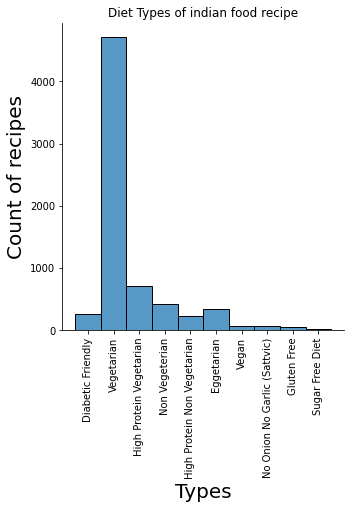

In [17]:
plt.figure(figsize=(10,5))
data = df['Diet']
f = sns.displot(data, discrete=True).set(title = "Diet Types of indian food recipe")
f.set_xticklabels(rotation=90)
f.set_xlabels("Types",fontsize=20)
f.set_ylabels("Count of recipes",fontsize=20)

f.savefig('Diet Types of indian food recipe.jpg')
plt.show()


# **We can see that the Vegetarian is the most common**

<Figure size 720x360 with 0 Axes>

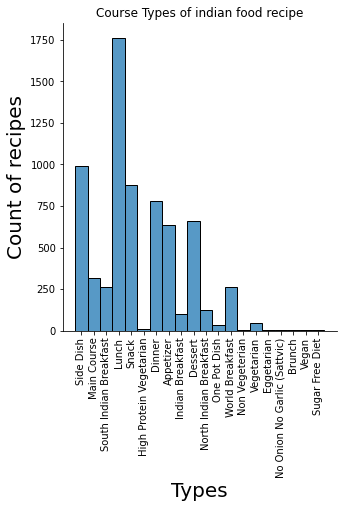

In [18]:
plt.figure(figsize=(10,5))
data_course = df['Course']
f = sns.displot(data_course, discrete=True).set(title = "Course Types of indian food recipe")
f.set_xticklabels(rotation=90)
f.set_xlabels("Types",fontsize=20)
f.set_ylabels("Count of recipes",fontsize=20)

f.savefig('Course Types of indian food recipe.jpg')
plt.show()

In [19]:
course = list(df.Course.unique())
course_count = list(df["Course"].value_counts().reset_index(name="count").query("count > 55")["count"]) 
course_count

[1763, 992, 876, 781, 659, 637, 315, 260, 260, 122, 101]

In [20]:

import plotly 
import plotly.graph_objects as go 
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode

labels = course
values = course_count

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show(renderer="colab")


# **The most common is the Lunch**

In [21]:
sub_category_Diet = df['Diet'].value_counts()

In [22]:
sub_category_Diet.shape

(10,)

In [23]:
#Import KMeans cluster
from sklearn.cluster import KMeans

In [24]:
df.head()

recipeName  ...                                       instructions
0                               Masala Karela Recipe  ...  To begin making the Masala Karela Recipe,de-se...
1                         Spicy Tomato Rice (Recipe)  ...  To make tomato puliogere, first cut the tomato...
2  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...  ...  To begin making the Ragi Vermicelli Recipe, fi...
3  Gongura Chicken Curry Recipe - Andhra Style Go...  ...  To begin making Gongura Chicken Curry Recipe f...
4  Andhra Style Alam Pachadi Recipe - Adrak Chutn...  ...  To make Andhra Style Alam Pachadi, first heat ...

[5 rows x 10 columns]

In [25]:
kmeans_5 = KMeans(n_clusters=3)
#Choose only 5 cluster
#Remove all the columns that not relevant
y_kmeans5 = kmeans_5.fit_predict(df.drop(df.columns[[0,1,2,3,6,7,8,9]], axis=1))
print(y_kmeans5)

[0 0 0 ... 0 0 0]


In [26]:
a = np.array([y_kmeans5])
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 6659, 1: 4, 2: 202}

In [27]:
y_kmeans5.shape

(6865,)

In [28]:
df['Cluster'] = y_kmeans5
sub_clustering = df.sort_values(by = 'Cluster')
sub_clustering.to_csv('sub_continents_clustering.csv')
sub_clustering.head()

recipeName  ... Cluster
0                                  Masala Karela Recipe  ...       0
4556           Coimbatore Style Drumstick Sambar Recipe  ...       0
4555  Godhumai Idli Recipe (Instant Whole Wheat Flou...  ...       0
4554  Vazhakkai Poriyal Recipe - Raw banana Roast Wi...  ...       0
4553  Medu Vada Recipe (Traditional Fried Urad Dal V...  ...       0

[5 rows x 11 columns]

In [29]:
sub_clustering_without_clutser_zero = sub_clustering[sub_clustering["Cluster"]!=0]
#Take a look on those we are not in cluster 0

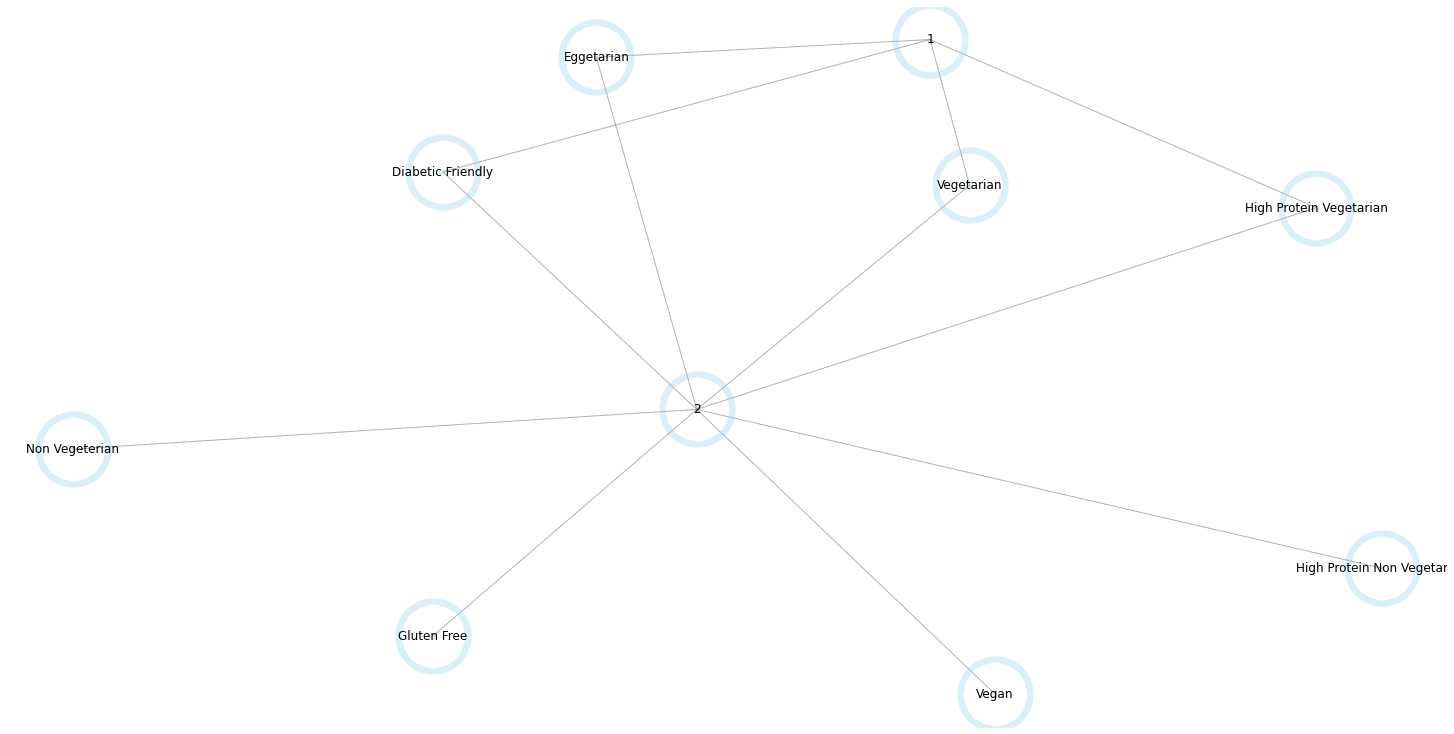

In [30]:
import networkx as nx
f = plt.figure(figsize=(20,10)) 

df_plot = pd.DataFrame()
df_plot['end'] = sub_clustering_without_clutser_zero['Diet']
df_plot['start'] = sub_clustering_without_clutser_zero['Cluster']

# Build your graph
G=nx.from_pandas_edgelist(df_plot, 'start', 'end')
 
# Graph with Custom nodes:
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(25), iterations=10)
nx.draw(G,pos=pos,node_size=40, font_size = 15, node_color="skyblue", node_shape="o", alpha=0.3, linewidths=70)
nx.draw_networkx_labels(G, pos=pos)
f.savefig("Clusters.jpg", bbox_inches = 'tight')


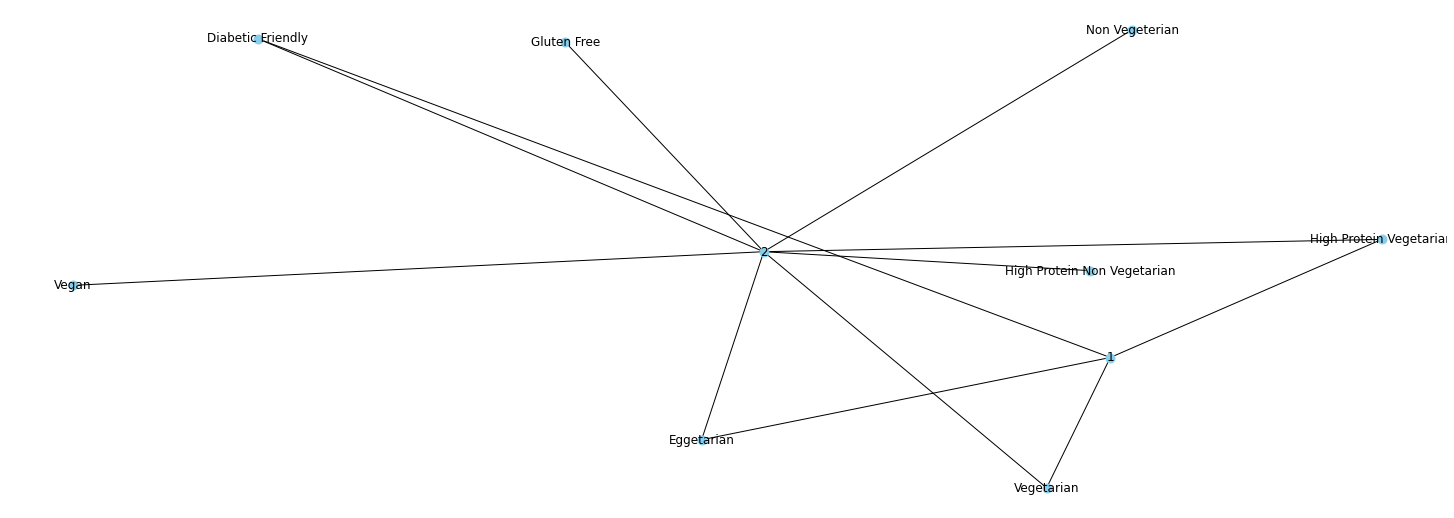

In [31]:
df1 = pd.DataFrame()
df1['end'] = sub_clustering_without_clutser_zero['Diet']
df1['start'] = sub_clustering_without_clutser_zero['Cluster']

# Build your graph
g=nx.from_pandas_edgelist(df1, 'start', 'end')

pos = nx.spring_layout(g, k=0.3*1/np.sqrt(25), iterations=10)
plt.figure(3, figsize=(20, 7))
nx.draw(g, pos=pos, node_size=80, font_size = 15, node_color="skyblue", node_shape="o")
nx.draw_networkx_labels(g, pos=pos)
plt.show()

#  **DecisionTreeClassifier**

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
y =df["Diet"]
label_encoder = preprocessing.LabelEncoder()
x = df[["TotalTimeInMins","Cuisine","Servings","Course"]]
x['Course'] = label_encoder.fit_transform(df['Course'])
x['Cuisine'] = label_encoder.fit_transform(df['Cuisine'])



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

y_train_label_en= pd.get_dummies(y_train)
y_test_label_en= pd.get_dummies(y_test)


sc = StandardScaler()
x_scale_train =sc.fit_transform(x_train)
x_scale_test =sc.fit_transform(x_test) 



In [33]:
y_train_label_en

Diabetic Friendly  Eggetarian  ...  Vegan  Vegetarian
5735                  0           0  ...      0           0
6811                  0           0  ...      0           1
555                   0           0  ...      0           0
1405                  0           0  ...      0           0
3378                  0           0  ...      0           1
...                 ...         ...  ...    ...         ...
1840                  0           0  ...      0           0
283                   0           0  ...      0           1
1567                  0           0  ...      0           1
2806                  0           0  ...      0           1
3125                  0           0  ...      0           1

[5492 rows x 10 columns]

In [34]:
decision_Tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_Tree.fit(x_scale_train,y_train_label_en)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**View the TREE**

In [35]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(decision_Tree, out_file=None, 
                       feature_names=x.columns, 
                       filled=True, precision=2))

In [36]:
decision_Tree.score(x_scale_test,y_test_label_en)


0.5061908230152949

In [37]:
decision_Tree_2 = DecisionTreeClassifier(max_depth=3).fit(x_scale_train,y_train_label_en)
decision_Tree_2.score(x_scale_test,y_test_label_en)

0.6817188638018936

In [38]:
kfold =KFold(n_splits=10, random_state=100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [39]:
results_kfold = cross_val_score(decision_Tree, x_scale_train , y_train_label_en , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 56.55%


IMPROVEMENT

# **GradientBoostingClassifier**

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting = GradientBoostingClassifier()

In [41]:
model_GradientBoosting.fit(x_scale_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
yhat = model_GradientBoosting.predict(x_scale_test)

In [43]:
yhat

array(['Vegetarian', 'Vegetarian', 'Vegetarian', ..., 'Vegetarian',
       'Vegetarian', 'Eggetarian'], dtype=object)

# **SVM**

In [44]:
from sklearn import svm


In [45]:
svm = svm.SVC(kernel='linear') # Linear Kernel

svm.fit(x_scale_train, y_train)
y_pred = svm.predict(x_scale_test)

In [46]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6919155134741443


In [47]:
results_kfold = cross_val_score(svm, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 68.39%


IMPROVEMENT

# **KNeighborsClassifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_scale_train,y_train_label_en)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [50]:
y_pred=knn.predict(x_scale_test)
metrics.accuracy_score(y_test_label_en,y_pred)

0.5746540422432629

In [51]:
range_of_k=range(1,40)
scores=[]
for k in range_of_k:
         knn = KNeighborsClassifier(n_neighbors=k)
         knn.fit(x_scale_train, y_train_label_en)
         y_pred = knn.predict(x_scale_test)
         scores.append(metrics.accuracy_score(y_test_label_en, y_pred))
scores

[0.5506190823015294,
 0.3896576839038602,
 0.5564457392571013,
 0.4763292061179898,
 0.562272396212673,
 0.5120174799708667,
 0.5659140568099054,
 0.5338674435542607,
 0.584122359796067,
 0.5411507647487254,
 0.6001456664238893,
 0.5608157319737801,
 0.6001456664238893,
 0.5724690458849235,
 0.607428987618354,
 0.5790240349599417,
 0.6132556445739257,
 0.5812090313182812,
 0.607428987618354,
 0.5746540422432629,
 0.6110706482155863,
 0.584122359796067,
 0.6161689730517116,
 0.5914056809905317,
 0.6212672978878369,
 0.6110706482155863,
 0.6336489439184269,
 0.6125273124544792,
 0.6270939548434086,
 0.616897305171158,
 0.6372906045156591,
 0.6241806263656228,
 0.6380189366351056,
 0.6190823015294975,
 0.6394756008739986,
 0.6285506190823015,
 0.6474872541879096,
 0.6372906045156591,
 0.6504005826656956]

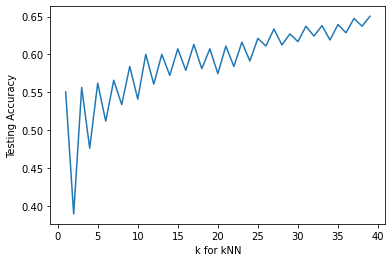

In [52]:
plt.plot(range_of_k,scores)
plt.xlabel('k for kNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [53]:
results_kfold = cross_val_score(knn, x_scale_train , y_train_label_en , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 64.00%


IMPROVEMENT

# **Naive Bayes**

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [55]:
gnb=GaussianNB()

In [56]:
y_pred_gnb=gnb.fit(x_scale_train,y_train).predict(x_scale_test)

In [57]:
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# **RandomForestRegressor**

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [59]:
y =df["TotalTimeInMins"]
label_encoder = preprocessing.LabelEncoder()
x = df[["Diet","Cuisine","Servings","Course"]]
x['Diet'] = label_encoder.fit_transform(df['Diet'])
x['Course'] = label_encoder.fit_transform(df['Course'])
x['Cuisine'] = label_encoder.fit_transform(df['Cuisine'])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
sc = StandardScaler()
x_scale_train =sc.fit_transform(x_train)
x_scale_test =sc.fit_transform(x_test)

random_forest  = RandomForestRegressor(n_estimators=100,random_state=1)
model_forest = random_forest.fit(x_scale_train,y_train)

In [60]:
y_predict = model_forest.predict(x_scale_test)


In [61]:
error = mean_absolute_error(y_test ,y_predict)
error

35.86707535541377

In [62]:
x_train.shape

(5492, 4)

In [63]:
results_kfold = cross_val_score(random_forest, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (abs(results_kfold.mean()*100.0)) )

Accuracy: 3.98%


# **Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression

predictor = LinearRegression()
predictor.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
outcome = predictor.predict(X=x_train)
coefficients = predictor.coef_

print('Outcome : {}\nCoefficients : {}'.format(outcome, coefficients))

Outcome : [53.57118085 58.9344314  57.23411211 ... 74.28537482 51.00413209
 57.36112042]
Coefficients : [-1.72870972 -0.08507663  0.21208494 -0.86551622]


In [66]:
#linear regression
results_kfold = cross_val_score(predictor, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (abs(results_kfold.mean()*100.0)))

Accuracy: 0.45%


# **RidgeCV**

In [67]:
from sklearn.linear_model import RidgeCV


In [68]:

regressor = RidgeCV(alphas=[1, 1e3, 1e6], store_cv_values=True)
regressor.fit(x_scale_train,y_train)
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)

[8577.12196287 8575.98945074 8623.12652611]


In [69]:
print(regressor.alpha_)

1000.0


In [70]:
predict_y = regressor.predict(x_scale_test)


In [71]:

mean_absolute_error(y_test,predict_y)

33.31193861545547

In [72]:
results_kfold = cross_val_score(regressor, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 0.43%


**Explore with pandasql**
# SQL

In [73]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=981b0ebcad2f6f78045e5d7f5d1ba8ccc446b5acc61ffadbcaccfe2207476cac
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [74]:
import pandasql


In [75]:
pandasql.sqldf("SELECT * FROM df where TotalTimeInMins > 1000 LIMIT 5;", globals())


recipeName  ... Cluster
0         Kavati recipe - Nepali Beans Soup (Recipe)  ...       1
1                  Traditional Christmas Cake Recipe  ...       1
2              Bhagara Peetha Recipe - Baghara Pitha  ...       1
3  Homemade Quick Puff Pastry Sheet Recipe | Perf...  ...       1

[4 rows x 11 columns]

In [76]:
pandasql.sqldf("SELECT * FROM df    WHERE Cuisine = 'Indian' AND Course='Dessert' order by TotalTimeInMins desc LIMIT 10;", globals())


recipeName  ... Cluster
0    Bottle Gourd Ice Cream Recipe - Lauki Ice Cream  ...       2
1  Masala Chai Kulfi Recipe With Bourbon Chocolat...  ...       2
2  Dry Fruits Suzhiyam (Boorelu) With Black Rice ...  ...       2
3                    Tender Coconut Ice Cream Recipe  ...       2
4                Vegan Carrot Halwa Ice Cream Recipe  ...       2
5              Passion Fruit- Shrikhand Shots Recipe  ...       2
6                             Lemon 7 Up Cake Recipe  ...       0
7                         Apple Pie Ice Cream Recipe  ...       0
8        Creamy Mango Kulfi Recipe With Cream Cheese  ...       0
9  Fruit-Chia Rice paper rolls in a Mango Tahini ...  ...       0

[10 rows x 11 columns]

In [77]:
pandasql.sqldf("SELECT Count(*) FROM df    WHERE Course = 'Dessert' AND Diet = 'Vegetarian' ;", globals())


Count(*)
0       544

**Is there a High Protein Non Vegetarian which is also a Dessert?**

In [78]:
pandasql.sqldf("SELECT Count(*) FROM df    WHERE Course = 'Dessert' AND Diet = 'High Protein Non Vegetarian' ;", globals())


Count(*)
0         1

In [79]:
pandasql.sqldf("SELECT * FROM df    WHERE   Diet = 'High Protein Non Vegetarian' OR  Diet = 'Vegetarian' GROUP BY TotalTimeInMins  order by TotalTimeInMins desc;", globals())


recipeName  ... Cluster
0                Bhagara Peetha Recipe - Baghara Pitha  ...       1
1    Kollu Masala Dosa Recipe - High Protein Horse ...  ...       2
2                      Homemade Mango Ice-Cream Recipe  ...       2
3    Ragi Or Finger Millet Powder/ Malt Recipe for ...  ...       2
4             Spicy Mexican Layered Chilli Rice Recipe  ...       2
..                                                 ...  ...     ...
133  Green Chilli Pickle Recipe (Gujarati Raiwala M...  ...       0
134  Ginger-Holi Basil Teasene - Ginger Basil Tea R...  ...       0
135                             Mango Milkshake Recipe  ...       0
136           Coffee Recipe With Instant Coffee Powder  ...       0
137  Kakka Orotti Recipe - Steamed Mini Rice Balls ...  ...       0

[138 rows x 11 columns]

#check similarity between recipes

In [80]:
ingredients_on_list = []
ingredients_on_list = df['ingredients'].tolist()
ingredients = []
for list in ingredients_on_list:
    i = list.split(', ')
    for ingredient in i:
        ingredients.append(ingredient.lower().strip())

unique_ingredients = sorted(set(ingredients))

In [81]:
df['ingredients'] = df['ingredients'].str.lower()
df['ingredients'] = df['ingredients'].str.strip()

func = lambda x :x.replace(', ',',')
df['ingredients'] = df['ingredients'].apply(func)

In [82]:
recipe_dict = dict(zip(df.recipeName, df.ingredients))

cleaner_recipe_dict = {}
for recipe, ingredients in recipe_dict.items():
    t_split = ingredients.split(",")
    cleaner_recipe_dict[recipe] = t_split

In [83]:
from itertools import combinations

In [84]:
recipe_combinations = []
for a,b in combinations(cleaner_recipe_dict.keys(), 2):
    recipe_combinations.append((a,b))

In [85]:
def similarity_score(a,b):
    ingredients_a = cleaner_recipe_dict[a]
    ingredients_b = cleaner_recipe_dict[b]
    num_similar = len(set(ingredients_a) & set(ingredients_b))
    num_a = len(ingredients_a)
    return num_similar/num_a

score_dict = {}
for combination in recipe_combinations:
    score = similarity_score(combination[0], combination[1])
    score_dict[combination] = score


In [86]:
food_vocab = set()

for ingredients in df['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [87]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(df['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [113]:
food_columns

6 karela (bitter gourd/ pavakkai) - deseeded  ...  1 इंच अदरक - सीधा और पतला काट ले
0                                              1.0  ...                               0.0
1                                              0.0  ...                               0.0
2                                              0.0  ...                               0.0
3                                              0.0  ...                               0.0
4                                              0.0  ...                               0.0
...                                            ...  ...                               ...
6860                                           0.0  ...                               0.0
6861                                           0.0  ...                               0.0
6862                                           0.0  ...                               0.0
6863                                           0.0  ...                               0.0
6864                                           0.0  ...                               1.0

[6865 rows x 24187 columns]

In [88]:
df_nonamerec_noing = df.drop(["recipeName", "ingredients","Cluster","instructions"], axis=1)


In [89]:
{column: df_nonamerec_noing[column].unique() for column in df_nonamerec_noing.columns if df_nonamerec_noing.dtypes[column] == 'object'}

{'Course': array(['Side Dish', 'Main Course', 'South Indian Breakfast', 'Lunch',
        'Snack', 'High Protein Vegetarian', 'Dinner', 'Appetizer',
        'Indian Breakfast', 'Dessert', 'North Indian Breakfast',
        'One Pot Dish', 'World Breakfast', 'Non Vegeterian', 'Vegetarian',
        'Eggetarian', 'No Onion No Garlic (Sattvic)', 'Brunch', 'Vegan',
        'Sugar Free Diet'], dtype=object),
 'Cuisine': array(['Indian', 'South Indian Recipes', 'Andhra', 'Udupi', 'Mexican',
        'Fusion', 'Continental', 'Bengali Recipes', 'Punjabi', 'Chettinad',
        'Tamil Nadu', 'Maharashtrian Recipes', 'North Indian Recipes',
        'Italian Recipes', 'Sindhi', 'Thai', 'Chinese', 'Kerala Recipes',
        'Gujarati Recipes\ufeff', 'Coorg', 'Rajasthani', 'Asian',
        'Middle Eastern', 'Coastal Karnataka', 'European', 'Kashmiri',
        'Karnataka', 'Lucknowi', 'Hyderabadi', 'Side Dish', 'Goan Recipes',
        'Arab', 'Assamese', 'Bihari', 'Malabar', 'Himachal', 'Awadhi',
        

In [90]:
df_cop = df_nonamerec_noing.copy()
    # for column, prefix in zip(columns, prefixes):
    #     dummies = pd.get_dummies(df_cop[column], prefix=prefix)
    #     df_cop = pd.concat([df_cop, dummies], axis=1)
    #     df_cop = df_cop.drop(column, axis=1)
    # return df_cop
dummies = pd.get_dummies(df_cop[['Cuisine', 'Course']])
df_cop = pd.concat([df_cop, dummies], axis=1)
df_cop = df_cop.drop(df_cop[['Cuisine', 'Course']], axis=1)


In [91]:
df_cop[['PrepTimeInMins', 'CookTimeInMins']] = df_cop[['PrepTimeInMins', 'CookTimeInMins']].replace(-1, np.NaN)


In [92]:
df_cop['PrepTimeInMins'] = df_cop['PrepTimeInMins'].fillna(df_cop['PrepTimeInMins'].mean())
df_cop['CookTimeInMins'] = df_cop['CookTimeInMins'].fillna(df_cop['CookTimeInMins'].mean())

In [114]:
df_cop.head()

PrepTimeInMins  CookTimeInMins  ...  Course_Vegetarian  Course_World Breakfast
0                 15              30  ...                  0                       0
1                  5              10  ...                  0                       0
2                 20              30  ...                  0                       0
3                 15              30  ...                  0                       0
4                 10              20  ...                  0                       0
...              ...             ...  ...                ...                     ...
6866              15              45  ...                  0                       0
6867              30              60  ...                  0                       0
6868               5              10  ...                  0                       0
6869              30              45  ...                  0                       0
6870              10              30  ...                  0                       0

[6865 rows x 107 columns]

In [93]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_cop['Diet'] = label_encoder.fit_transform(df_cop['Diet'])

In [94]:
y = df_cop['Diet']

X = df_cop.drop('Diet', axis=1)
X_food = pd.concat([X, food_columns], axis=1)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [96]:
X_food.shape

(6871, 24293)

In [97]:
result = np.zeros(6871,)
result[:y.shape[0]] = y
result.shape
y_1 = result
print(y.shape)
print(X.shape)


(6865,)
(6865, 106)


In [98]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y_1, train_size=0.7, random_state=42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y_1, train_size=0.7, random_state=42)

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense


# Neural network
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(X_food_train, y_train, validation_split=0.2, epochs=1000, batch_size=64)



# **Some NLP**

In [100]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import unicodedata
import sys

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [101]:
text_ingredients = df["ingredients"]

In [102]:
first_word = np.random.choice(text_ingredients)
chain = [first_word]
n_words = 30

In [103]:
chain

['1 cup whole wheat flour,1/4 cup all purpose flour (maida),1 whole egg,salt - to taste,1 cup spinach - chopped,4-5 cloves garlic - chopped,100 grams feta cheese - grated,black pepper powder - for seasoning,salt - to taste,2 tablespoon butter,2 tablespoon all purpose flour (maida),1 cup milk,1/4 cup spinach - pureed,1 sprig dried thyme leaves,salt - to taste,black pepper powder - for seasoning']

In [104]:
MEASURE_TOKENS = [
    'cup', 'can', 'teaspoon', 'tsp', 'tablespoon', 'tbsp', 'pound', 'lb', 'jar', 'bottle', 'stick', 'about', 'pounds','cups'
    'pinch', 'appx', 'half', 'optional', 'milliter', 'micro', 'ounce', 'small', 'large', 'medium', 'envelope', 
    'ear', 'piece', 'drops', 'oz', 'bunch', 'slice', 'spoonful', 'advertisement']

PREP_TOKENS = [
	'diced', 'stewed', 'chopped', 'crumbled', 'peeled', 'minced', 'fresh', 'divided', 'cooked', 'washed', 'softened',
	'sliced', 'deveined', 'shaken', 'finely', 'toasted', 'frozen', 'mixed', 'cut', 'squeezed', 'cracked', 'halved',
	'roasted', 'grilled','dried', 'freshly', 'ground', 'coarse', 'beaten', 'blend', 'blended', 'seeded', 
	'grated', 'chilled', 'garnish', 'discarded', 'powdered', 'cooled', 'sifted', 'drained', 'granulated', 'crushed']
def remove_stop_words(s):
	return ' '.join([i for i in s.split(' ') if i not in stop_words])

def remove_measure_prep(s):
	return ' '.join([i for i in s.split(' ') if i not in MEASURE_TOKENS and i not in PREP_TOKENS ]) 

def replace_plurals(s):
	stemmer = PorterStemmer()
	return ' '.join([stemmer.stem(i) for i in s.split(' ')])
 




def remove_digits(s):
	return re.sub(r'[\d]','',s)	

def remove_trailing_s(token):
    if token.endswith('s'):
        return token[:-1]
    else:
        return token

def preprocess_ingredients(ingredients_list):
	preprocess_ingredients = []
	for ingredient in ingredients_list:
		
		ingredient = ingredient.lower()
		ingredient = remove_digits(ingredient)
		ingredient = remove_measure_prep(ingredient)
		ingredient = remove_stop_words(ingredient)
		preprocess_ingredients.append(ingredient.strip())

	return preprocess_ingredients  

text_ingredients_preprocess = preprocess_ingredients(df["ingredients"])

punc_8 =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}',"‘","’", '~',"”","’","’","“","***","****","—","*****","^","...","a","ye","d","the","and",str(range(0,1000))]
remove_and_clean_final = [i for i in text_ingredients_preprocess if i not in punc_8]
corpus = [i.replace('\n',' ') for i in remove_and_clean_final]
corpus = [i.replace('\t',' ') for i in corpus]
corpus = [i.replace('“', ' " ') for i in corpus]
corpus = [i.replace('”', ' " ') for i in corpus]
for spaced in ['.','-',',','!','?','(','—',')']:
    corpus =[i.replace(spaced, ' {0} '.format(spaced)) for i in text_ingredients]
len(corpus) #10510355 characters

6865

In [105]:
pip install markovify


     |████████████████████████████████| 245kB 8.3MB/s 
  Created wheel for markovify: filename=markovify-0.9.0-cp37-none-any.whl size=18476 sha256=cba60cad02393947cc5d00068f2ae5973b2dece35423d26c5c4a8233aad80d37
  Stored in directory: /root/.cache/pip/wheels/03/59/5b/04c5f27d57977580c1122fa69a69c327dede5a30f9dac54c55
Successfully built markovify


In [106]:
import markovify
# Build the model Markov chain
text_model = markovify.Text(corpus)

In [107]:
#Generate random recipe

for i in range(1):
  print(text_model.make_sentence())


1-1 / 2 cup wheat flour,1 tbsp oil,1 tsp rye,1 tsp urad dal,1 sprig curry leaves,1 tablespoon red wine vinaigrette,1/2 dried oregano,2 onion - finely chopped,1/4 cup mint - cut,1/2 cup yam - peel and cut into squares,6 cloves garlic - chopped,4 cloves garlic - grated,2 tablespoons white chocolate - compound,3/4 cup condensed milk,1/4 cup extra virgin olive oil,1 tablespoon white vinegar,1 tablespoon honey,salt - oil,as per taste


In [108]:
for i in range(1):
  print(text_model.make_short_sentence(140))

1 कप चावल,2 बड़े चमच्च दूध,1 बड़ा चम्मच हल्दी पाउडर,1/4 छोटा चमच्च राइ,1/2 बड़ा चमच्च घी,1 छोटा चम्मच मेथी के दाने,1 टहनी हरा धनिया - थोड़ा


In [109]:
row = str([cell.encode('utf-8') for cell in corpus])

In [110]:
for recipe_index, recipe in enumerate(corpus[:10]):
    print('Recipe #{} length: {}'.format(recipe_index + 1, len(recipe)))

Recipe #1 length: 333
Recipe #2 length: 302
Recipe #3 length: 313
Recipe #4 length: 524
Recipe #5 length: 239
Recipe #6 length: 467
Recipe #7 length: 520
Recipe #8 length: 335
Recipe #9 length: 386
Recipe #10 length: 259


In [111]:
from nltk.tokenize import word_tokenize

corpus_words = [i.split() for i in corpus]
punc_8 =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}',"‘","’", '~',"”","’","’","“","***","****","—","*****","^","...","a","ye","d","the","and",str(range(0,1000))]
remove_and_clean_final = [i for i in corpus_words if i not in punc_8]

In [112]:
text = nltk.Text(remove_and_clean_final)
